In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [9]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [10]:
data['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

In [11]:
data['Urban'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
data['US'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
data = pd.get_dummies(data)

In [14]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
data['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

##### Mean and Median of the Sales column is 7.49. So since the required predictions are either high sales or low sales, values higher than the mean will be high sales and the rest will be low sales

In [16]:
data['Sales'] = ['High Sales' if data['Sales'].iloc[i] >= 7.49 else 'Low Sales' for i in range(0, (data.shape)[0])]

In [17]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,High Sales,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,High Sales,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,High Sales,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Low Sales,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Low Sales,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,High Sales,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Low Sales,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Low Sales,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Low Sales,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [18]:
x = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [34]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

## Decision Tree Model

### Using entropy criteria

In [47]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

[Text(0.7645089285714286, 0.9583333333333334, 'x[8] <= 0.5\nentropy = 1.0\nsamples = 320\nvalue = [160, 160]'),
 Text(0.6004464285714286, 0.875, 'x[4] <= 125.5\nentropy = 0.973\nsamples = 255\nvalue = [103, 152]'),
 Text(0.41517857142857145, 0.7916666666666666, 'x[2] <= 6.5\nentropy = 0.998\nsamples = 170\nvalue = [90, 80]'),
 Text(0.26339285714285715, 0.7083333333333334, 'x[0] <= 131.5\nentropy = 0.963\nsamples = 98\nvalue = [38, 60]'),
 Text(0.15178571428571427, 0.625, 'x[4] <= 102.5\nentropy = 0.873\nsamples = 75\nvalue = [22, 53]'),
 Text(0.08928571428571429, 0.5416666666666666, 'x[5] <= 35.0\nentropy = 0.999\nsamples = 37\nvalue = [19, 18]'),
 Text(0.07142857142857142, 0.4583333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.10714285714285714, 0.4583333333333333, 'x[2] <= 2.5\nentropy = 0.989\nsamples = 32\nvalue = [14, 18]'),
 Text(0.08928571428571429, 0.375, 'x[7] <= 0.5\nentropy = 0.999\nsamples = 27\nvalue = [14, 13]'),
 Text(0.05357142857142857, 0.2916666666

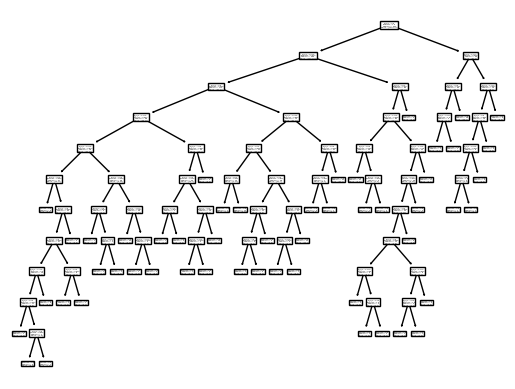

In [48]:
#PLot the decision tree
tree.plot_tree(model)

In [49]:
text = tree.export_text(model)  
print(text) 

|--- feature_8 <= 0.50
|   |--- feature_4 <= 125.50
|   |   |--- feature_2 <= 6.50
|   |   |   |--- feature_0 <= 131.50
|   |   |   |   |--- feature_4 <= 102.50
|   |   |   |   |   |--- feature_5 <= 35.00
|   |   |   |   |   |   |--- class: High Sales
|   |   |   |   |   |--- feature_5 >  35.00
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 216.50
|   |   |   |   |   |   |   |   |   |--- feature_4 <= 86.50
|   |   |   |   |   |   |   |   |   |   |--- class: High Sales
|   |   |   |   |   |   |   |   |   |--- feature_4 >  86.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: Low Sales
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: High Sales
|   |   |   |   |   |   |   |   |--- feature_3 >  216.50
|   |   |   |   |   |   |   |   |   |--- class: Hi

In [50]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

High Sales    49
Low Sales     31
dtype: int64

In [51]:
preds

array(['High Sales', 'Low Sales', 'High Sales', 'High Sales', 'Low Sales',
       'High Sales', 'Low Sales', 'High Sales', 'High Sales',
       'High Sales', 'High Sales', 'High Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'Low Sales', 'High Sales', 'High Sales',
       'High Sales', 'High Sales', 'High Sales', 'High Sales',
       'Low Sales', 'High Sales', 'High Sales', 'Low Sales', 'High Sales',
       'Low Sales', 'Low Sales', 'High Sales', 'High Sales', 'High Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'High Sales', 'High Sales',
       'Low Sales', 'High Sales', 'High Sales', 'Low Sales', 'High Sales',
       'High Sales', 'High Sales', 'Low Sales', 'Low Sales', 'Low Sales',
       'High Sales', 'High Sales', 'Low Sales', 'Low Sales', 'High Sales',
       'Low Sales', 'High Sales', 'Low Sales', 'Low Sales', 'High Sales',
       'High Sales', 'Low Sales', 'High Sales', 'High Sales',
       'High Sales', 'High Sales', 'High Sales', 'Low Sales', 'Low Sales',
   

In [52]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,High Sales,Low Sales
Sales,,
High Sales,35,6
Low Sales,14,25


In [53]:
# Accuracy 
np.mean(preds==y_test)

0.75

### Building Decision Tree Classifier (CART) using Gini Criteria

In [42]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini') 

In [43]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier()

[Text(0.74375, 0.9615384615384616, 'x[8] <= 0.5\ngini = 0.5\nsamples = 320\nvalue = [160, 160]'),
 Text(0.5375, 0.8846153846153846, 'x[4] <= 124.5\ngini = 0.482\nsamples = 255\nvalue = [103, 152]'),
 Text(0.32916666666666666, 0.8076923076923077, 'x[2] <= 6.5\ngini = 0.498\nsamples = 167\nvalue = [89, 78]'),
 Text(0.17916666666666667, 0.7307692307692307, 'x[4] <= 100.5\ngini = 0.474\nsamples = 96\nvalue = [37, 59]'),
 Text(0.1, 0.6538461538461539, 'x[5] <= 66.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16]'),
 Text(0.06666666666666667, 0.5769230769230769, 'x[0] <= 118.5\ngini = 0.42\nsamples = 30\nvalue = [21, 9]'),
 Text(0.05, 0.5, 'x[4] <= 70.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.03333333333333333, 0.4230769230769231, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.06666666666666667, 0.4230769230769231, 'x[3] <= 216.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.03333333333333333, 0.34615384615384615, 'x[6] <= 12.0\ngini = 0.245\nsamples = 7\nvalue = [

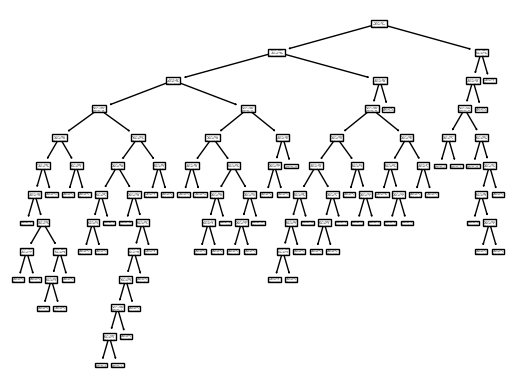

In [44]:
#PLot the decision tree
tree.plot_tree(model_gini)

In [45]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test) 

0.7375

In [46]:
print('Total number of tree nodes', model_gini.tree_.node_count)
print('Max depth of the tree', model_gini.tree_.max_depth)

Total number of tree nodes 113
Max depth of the tree 12
